In [1]:
import torch

file_path = r"C:\Users\hp\Desktop\python\eeg_5_95_std.pth"
data = torch.load(file_path)

print("Loaded object type:", type(data))

if isinstance(data, dict):
    print("Keys in dictionary:", data.keys())
    for key, val in data.items():
        print(f"Key: {key}, Type: {type(val)}", end='')
        if hasattr(val, 'shape'):
            print(f" | Shape: {val.shape}")
        else:
            print()
else:
    # If not a dictionary, this might be the EEG signal tensor directly
    if hasattr(data, 'shape'):
        print("Loaded tensor shape:", data.shape)
    else:
        print("Loaded object content:", data)


Loaded object type: <class 'dict'>
Keys in dictionary: dict_keys(['dataset', 'labels', 'images'])
Key: dataset, Type: <class 'list'>
Key: labels, Type: <class 'list'>
Key: images, Type: <class 'list'>


In [2]:
for key, val in data.items():
    print(f"Key: {key} | Type: {type(val)}", end='')
    if hasattr(val, 'shape'):
        print(f" | Shape: {val.shape}")
    else:
        print()

Key: dataset | Type: <class 'list'>
Key: labels | Type: <class 'list'>
Key: images | Type: <class 'list'>


In [3]:
eeg_signal = data['dataset']  # Tensor or numpy array
label = data['images']      # Label as int or similar


In [4]:
import numpy as np
if not hasattr(eeg_signal, 'shape'):
    eeg_signal = np.array(eeg_signal)


In [5]:
print(type(eeg_signal))
print(hasattr(eeg_signal, 'shape'))


<class 'numpy.ndarray'>
True


In [6]:
import numpy as np

print(type(eeg_signal))         # Should be <class 'numpy.ndarray'>
print(eeg_signal.shape)         # Check dimensions, e.g., (channels, samples)


<class 'numpy.ndarray'>
(11965,)


In [7]:
for i, elem in enumerate(eeg_signal):
    print(f"Element {i}: type = {type(elem)}")
    if hasattr(elem, 'shape'):
        print(f"  shape: {elem.shape}")
    else:
        try:
            print(f"  length or value: {len(elem)}")
        except TypeError:
            print(f"  value: {elem}")


Element 0: type = <class 'dict'>
  length or value: 4
Element 1: type = <class 'dict'>
  length or value: 4
Element 2: type = <class 'dict'>
  length or value: 4
Element 3: type = <class 'dict'>
  length or value: 4
Element 4: type = <class 'dict'>
  length or value: 4
Element 5: type = <class 'dict'>
  length or value: 4
Element 6: type = <class 'dict'>
  length or value: 4
Element 7: type = <class 'dict'>
  length or value: 4
Element 8: type = <class 'dict'>
  length or value: 4
Element 9: type = <class 'dict'>
  length or value: 4
Element 10: type = <class 'dict'>
  length or value: 4
Element 11: type = <class 'dict'>
  length or value: 4
Element 12: type = <class 'dict'>
  length or value: 4
Element 13: type = <class 'dict'>
  length or value: 4
Element 14: type = <class 'dict'>
  length or value: 4
Element 15: type = <class 'dict'>
  length or value: 4
Element 16: type = <class 'dict'>
  length or value: 4
Element 17: type = <class 'dict'>
  length or value: 4
Element 18: type = <

In [8]:
# Inspect keys and the type/shape of values in the first dictionary element
print("Keys in first element dictionary:", eeg_signal[0].keys())

for key, val in eeg_signal[0].items():
    print(f"Key: {key} | Type: {type(val)}", end='')
    if hasattr(val, 'shape'):
        print(f" | Shape: {val.shape}")
    elif hasattr(val, '__len__'):
        try:
            print(f" | Length: {len(val)}")
        except TypeError:
            print()
    else:
        print()


Keys in first element dictionary: dict_keys(['eeg', 'image', 'label', 'subject'])
Key: eeg | Type: <class 'torch.Tensor'> | Shape: torch.Size([128, 500])
Key: image | Type: <class 'int'>
Key: label | Type: <class 'int'>
Key: subject | Type: <class 'int'>


In [79]:
print(type(data['images'][i]))  # Should be np.ndarray or PIL Image, not int


<class 'str'>


In [83]:
image_path = data['images'][i]
print(f"Image path: {image_path}")


Image path: n02951358_31190


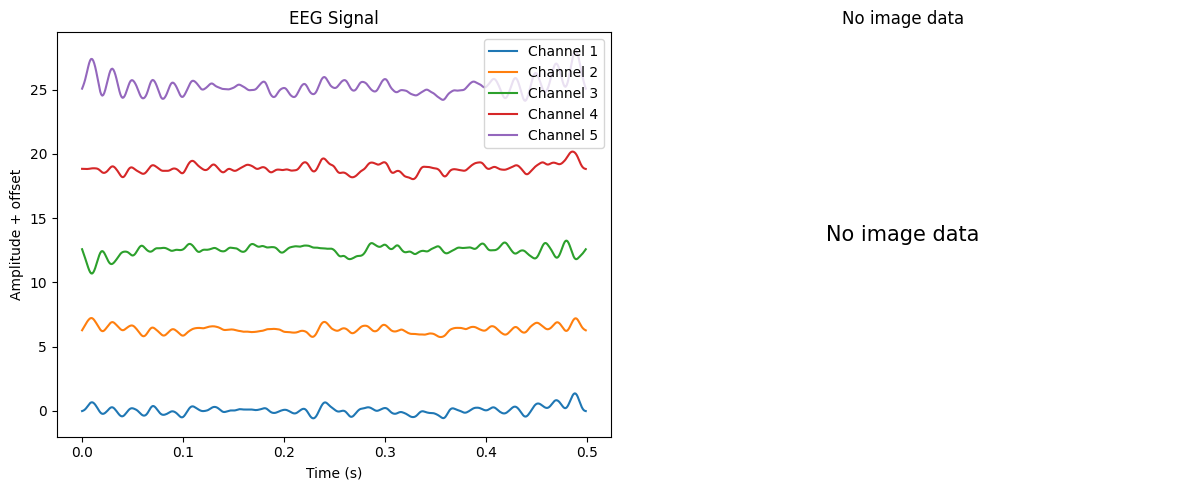

In [10]:
import matplotlib.pyplot as plt
import numpy as np

i = 0  # sample index

# Extract EEG numpy array from the dict
eeg_array = eeg_signal[i]['eeg']
if hasattr(eeg_array, 'numpy'):
    eeg_array = eeg_array.numpy()

# Extract the image value
image_value = data['images'][i]

# Prepare time axis
sfreq = 1000
times = np.arange(eeg_array.shape[1]) / sfreq

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
offset = np.max(np.abs(eeg_array))
for ch in range(min(5, eeg_array.shape[0])):
    plt.plot(times, eeg_array[ch] + ch * offset, label=f'Channel {ch+1}')
plt.title('EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude + offset')
plt.legend()

plt.subplot(1, 2, 2)

# Check if image_value is an actual image array or just an int label/ID
if isinstance(image_value, np.ndarray):
    plt.imshow(image_value)
    plt.axis('off')
    plt.title('Corresponding Image')
elif isinstance(image_value, int):
    # If just an integer (image ID), display as text or handle differently
    plt.text(0.5, 0.5, f'Image ID: {image_value}', horizontalalignment='center',
             verticalalignment='center', fontsize=15, transform=plt.gca().transAxes)
    plt.axis('off')
    plt.title('Image ID (no image data)')
else:
    # Any other type fallback
    plt.text(0.5, 0.5, 'No image data', horizontalalignment='center',
             verticalalignment='center', fontsize=15, transform=plt.gca().transAxes)
    plt.axis('off')
    plt.title('No image data')

plt.tight_layout()
plt.show()
